Question Answering Transformers with Hugging Face

**March 2023 update* Former Hugging Face installation conflicted with present Torch versions. The Hugging Face cell was updated. 

Naturally, OpenAI GPT-3.5 turbo(ChatGPT) can perform these tasks such as in [Fake_News_Analyis_with_ChatGPT](https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/blob/main/Chapter13/Fake_News_Analysis_with_ChatGPT.ipynb) in this repository. However, it is important to explore several platforms to be ready to adapt to all project environments. Hugging Face remains a solid platform for many projects.

[Hugging Face notebook Resources and Documentation](https://huggingface.co/)

#Method 0: Trial and error

In [1]:
from IPython.display import Image     #This is used for rendering images in the notebook

In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline

In [ ]:
nlp_qa = pipeline('question-answering')

Sample 1:The traffic began to slow down on Pioneer Boulevard in Los Angeles, making it difficult to get out of the city. However, WBGO was playing some cool jazz, and the weather was cool, making it rather pleasant to be making it out of the city on this Friday afternoon. Nat King Cole was singing as Jo and Maria slowly made their way out of LA and drove toward Barstow. They planned to get to Las Vegas early enough in the evening to have a nice dinner and go see a show.

In [ ]:
sequence = "The traffic began to slow down on Pioneer Boulevard in Los Angeles, making it difficult to get out of the city. However, WBGO was playing some cool jazz, and the weather was cool, making it rather pleasant to be making it out of the city on this Friday afternoon. Nat King Cole was singing as Jo and Maria slowly made their way out of LA and drove toward Barstow. They planned to get to Las Vegas early enough in the evening to have a nice dinner and go see a show."

Question-Answering

In [ ]:
nlp_qa(context=sequence, question='Where is Pioneer Boulevard ?')

{'answer': 'Los Angeles', 'end': 66, 'score': 0.9879737496376038, 'start': 55}

#Method 1: Named Entity Recognition(NER) first

##Using NER to find questions




In [ ]:
nlp_ner = pipeline("ner")
print(nlp_ner(sequence))

[{'word': 'Pioneer', 'score': 0.9735257029533386, 'entity': 'I-LOC', 'index': 8}, {'word': 'Boulevard', 'score': 0.9944824576377869, 'entity': 'I-LOC', 'index': 9}, {'word': 'Los', 'score': 0.9995775818824768, 'entity': 'I-LOC', 'index': 11}, {'word': 'Angeles', 'score': 0.9995693564414978, 'entity': 'I-LOC', 'index': 12}, {'word': 'W', 'score': 0.991984486579895, 'entity': 'I-ORG', 'index': 26}, {'word': '##B', 'score': 0.990750253200531, 'entity': 'I-ORG', 'index': 27}, {'word': '##G', 'score': 0.9884582161903381, 'entity': 'I-ORG', 'index': 28}, {'word': '##O', 'score': 0.9722681641578674, 'entity': 'I-ORG', 'index': 29}, {'word': 'Nat', 'score': 0.9966881275177002, 'entity': 'I-PER', 'index': 59}, {'word': 'King', 'score': 0.997648298740387, 'entity': 'I-PER', 'index': 60}, {'word': 'Cole', 'score': 0.9986170530319214, 'entity': 'I-PER', 'index': 61}, {'word': 'Jo', 'score': 0.9978788495063782, 'entity': 'I-PER', 'index': 65}, {'word': 'Maria', 'score': 0.9988164901733398, 'entity'

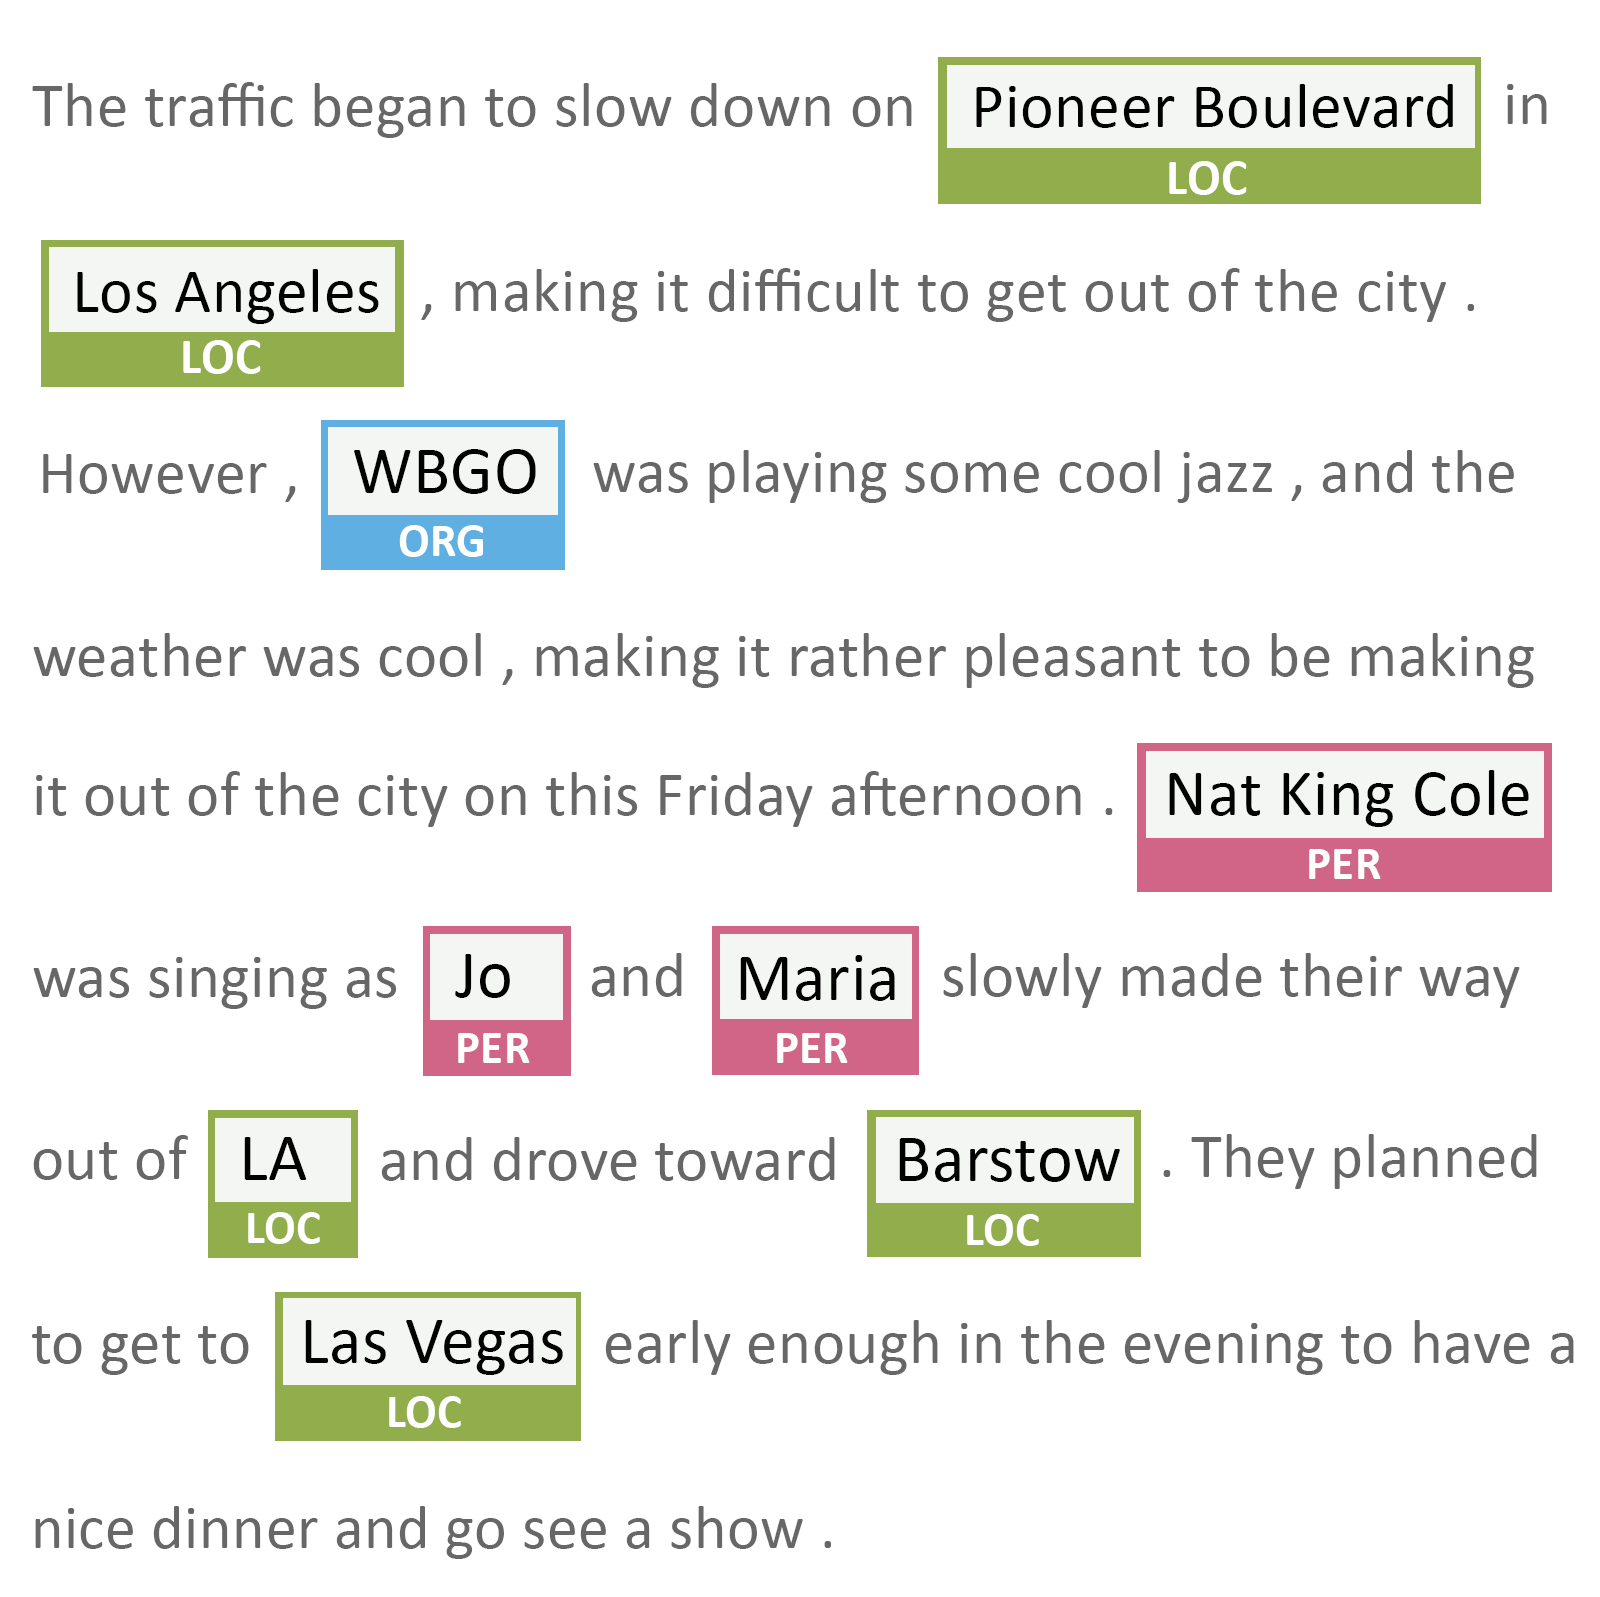

In [5]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/11/B17948_11_01.png', width=500) #This is used for rendering images in the notebook

In [ ]:
nlp_qa = pipeline('question-answering')
print("Question 1.",nlp_qa(context=sequence, question='Where is Pioneer Boulevard ?'))
print("Question 2.",nlp_qa(context=sequence, question='Where is Los Angeles located?'))
print("Question 3.",nlp_qa(context=sequence, question='Where is LA ?'))
print("Question 4.",nlp_qa(context=sequence, question='Where is Barstow ?'))
print("Question 5.",nlp_qa(context=sequence, question='Where is Las Vegas located ?'))

Question 1. {'score': 0.9879737496376038, 'start': 55, 'end': 66, 'answer': 'Los Angeles'}
Question 2. {'score': 0.9875388741493225, 'start': 34, 'end': 51, 'answer': 'Pioneer Boulevard'}
Question 3. {'score': 0.5090540647506714, 'start': 55, 'end': 66, 'answer': 'Los Angeles'}
Question 4. {'score': 0.3695431649684906, 'start': 387, 'end': 396, 'answer': 'Las Vegas'}
Question 5. {'score': 0.21839778125286102, 'start': 355, 'end': 362, 'answer': 'Barstow'}


#Person entity questions

In [ ]:
nlp_qa = pipeline('question-answering')
nlp_qa(context=sequence, question='Who was singing ?')

{'answer': 'Nat King Cole',
 'end': 277,
 'score': 0.9653680324554443,
 'start': 264}

In [ ]:
nlp_qa(context=sequence, question='Who was going to Las Vegas ?')

{'answer': 'Nat King Cole',
 'end': 277,
 'score': 0.4316245913505554,
 'start': 264}

#Method 2: SRL first

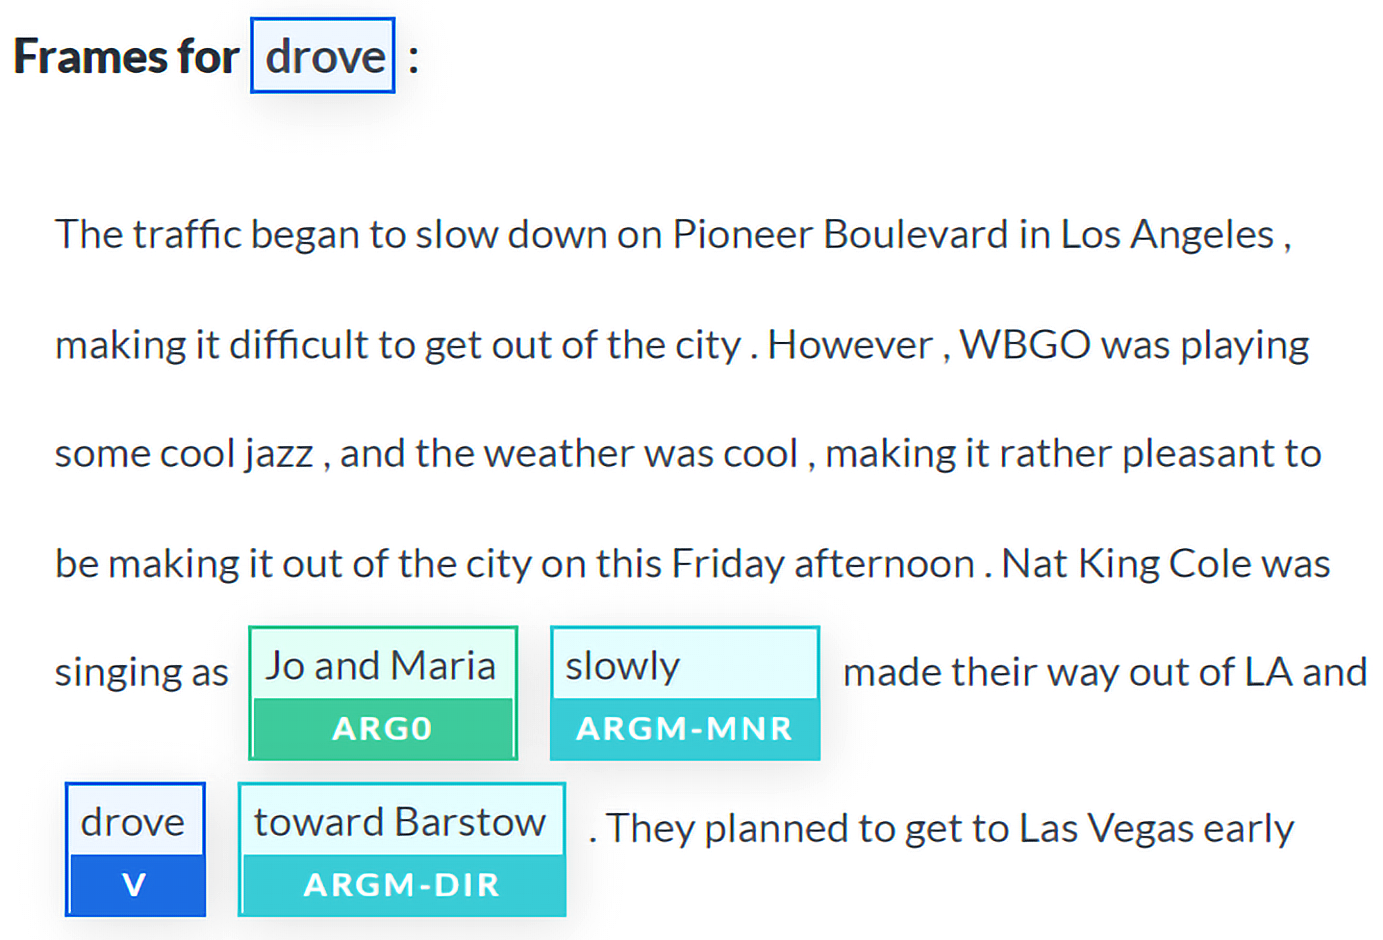

In [4]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/11/B17948_11_02.png', width=500) #This is used for rendering images in the notebook

In [ ]:
nlp_qa(context=sequence, question='Who are they?')

{'answer': 'Jo and Maria',
 'end': 305,
 'score': 0.8486908078193665,
 'start': 293}

In [ ]:
nlp_qa(context=sequence, question='Who drove to Las Vegas?')

{'answer': 'Nat King Cole was singing as Jo and Maria',
 'end': 305,
 'score': 0.35941559076309204,
 'start': 264}

#Question-answering with ELECTRA
Description of the Default Model

In [ ]:
print(nlp_qa.model)

DistilBertForQuestionAnswering(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            

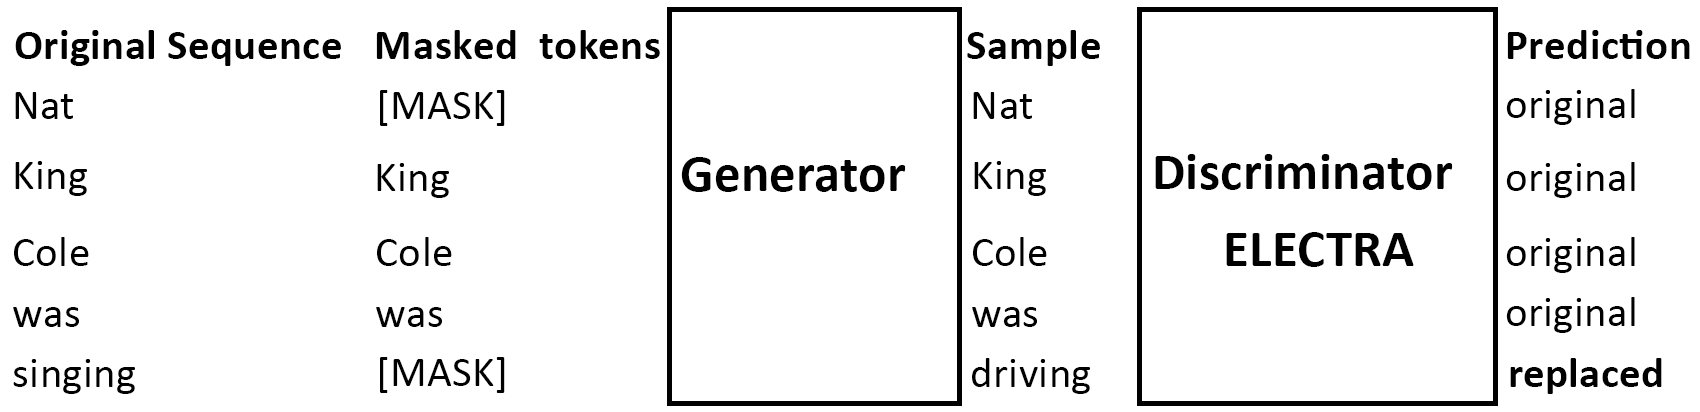

In [3]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/11/B17948_11_03.png', width=600) #This is used for rendering images in the notebook

In [ ]:
nlp_qa = pipeline('question-answering', model='google/electra-small-generator', tokenizer='google/electra-small-generator')
nlp_qa(context=sequence, question='Who drove to Las Vegas ?')

Some weights of the model checkpoint at google/electra-small-generator were not used when initializing ElectraForQuestionAnswering: ['generator_predictions.LayerNorm.weight', 'generator_predictions.LayerNorm.bias', 'generator_predictions.dense.weight', 'generator_predictions.dense.bias', 'generator_lm_head.weight', 'generator_lm_head.bias']
- This IS expected if you are initializing ElectraForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForQuestionAnswering were not initialized from the model checkpoint at google/electra-small-generator and are newly initialized: ['qa_outputs.wei

{'answer': 'rather pleasant to be making it out of the city on this',
 'end': 245,
 'score': 0.00034621506347320974,
 'start': 190}

Question Answering with default Model and SRL

In [ ]:
nlp_qa = pipeline('question-answering')
nlp_qa(context=sequence, question='What was slow?')

{'answer': 'The traffic', 'end': 11, 'score': 0.46530455350875854, 'start': 0}

In [ ]:
nlp_qa = pipeline('question-answering')
nlp_qa(context=sequence, question='What was playing')

{'answer': 'cool jazz', 'end': 152, 'score': 0.3511938154697418, 'start': 143}

In [ ]:
nlp_qa = pipeline('question-answering')
nlp_qa(context=sequence, question='Who sees a show?')

{'answer': 'Nat King Cole',
 'end': 277,
 'score': 0.5588219165802002,
 'start': 264}